In [2]:
import numpy as np
import pandas as pd

In [6]:
import pydicom

In [26]:
pip install kornia

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "E:\User\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\User\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "E:\User\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "E:\User\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "E:\User\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "E:\User\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "E:\User\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "E:\User\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handli

In [18]:
# this following line tells Jupyter to display images here in the browser, 
# rather than in separate window.

%matplotlib inline 

# import pydicom library

import dicom

# import matplotlib and numpy

import matplotlib.pyplot as plt 
import matplotlib.image as mpimage


E:\User\anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


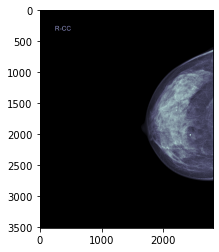

In [36]:
import pydicom
import pydicom.data
  
base = r"E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0"
pass_dicom = "CN00020000.dcm"  
  
filename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = pydicom.dcmread(filename)
  
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()

In [37]:
# load some handy functions from the scikit-image library

from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

# import operating system and glob libraries

import os, glob

# import some useful date functions

from datetime import datetime

In [38]:
ds = pydicom.dcmread(filename, force=True)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 216
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1578.15.4.203177791.8104.1658401325.47
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1578.15.0.2.0.0
(0002, 0013) Implementation Version Name         SH: 'DATAMED_DCM_200'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', '', 'RIGHT']
(0008, 0016) SOP Class UID                       UI: Digital Mammography X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID               

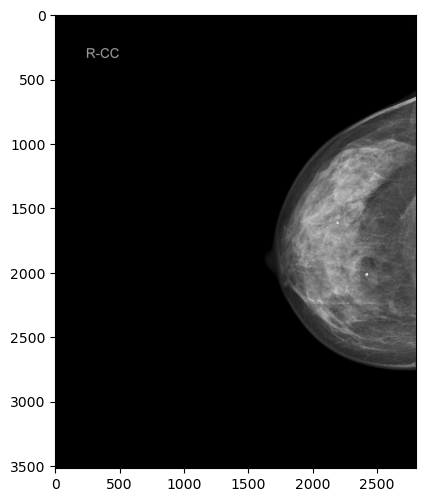

In [39]:
# tell matplotlib to display our images as a 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 

# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) 

In [57]:
# tell matplotlib to display our images as a 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 

# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(im.pixel_array, cmap=plt.cm.gray) 

AttributeError: 'numpy.uint8' object has no attribute 'pixel_array'

<Figure size 600x600 with 0 Axes>

In [16]:
ds.PatientName # show patient name


''

In [17]:
ds.dir("patient")


['DistanceSourceToPatient',
 'IssuerOfPatientID',
 'OtherPatientIDs',
 'OtherPatientNames',
 'PatientAddress',
 'PatientAge',
 'PatientBirthDate',
 'PatientBirthName',
 'PatientComments',
 'PatientID',
 'PatientInstitutionResidence',
 'PatientMotherBirthName',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PatientSupportID']

In [18]:
ds.PatientAddress

''

In [21]:
# Contrast stretching try 1
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds.pixel_array, (0, 99.5))

img_rescale_1 = exposure.rescale_intensity(ds.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_1, cmap=plt.cm.gray)


ValueError: The length of the pixel data in the dataset (19700800 bytes) doesn't match the expected length (29551200 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.

<Figure size 600x600 with 0 Axes>

In [20]:
ds.PhotometricInterpretation = 'RGB'
ds.SamplesPerPixel = 3
ds.BitsAllocated = 8
ds.BitsStored = 8
ds.HighBit = 7
ds.add_new(0x00280006, 'US', 0)

In [22]:
ds.PixelData = img_bbox.tobytes()
ds.save_as(OUTPUT_DICOM_PATH)

NameError: name 'img_bbox' is not defined

In [ ]:
########################ASIMAN BURDAN BAX###############################
########################RGB BELE OLAR??????#############################

In [1]:
import pydicom
ds = pydicom.dcmread("E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0\CN00020000.dcm")
img = ds.pixel_array # dtype = uint16
img = img.astype(float)
img = img*ds.RescaleSlope + ds.RescaleIntercept

In [2]:
def apply_ct_window(img, window):
    # window = (window width, window level)
    R = (img-window[1]+0.5*window[0])/window[0]
    R[R<0] = 0
    R[R>1] = 1
    return R
display_img = apply_ct_window(img, [400,50])

In [6]:
import numpy as np
from PIL import Image, ImageDraw
# for this particular example
top, left, bottom, right = [211,99,291,158]
thickness = 4
img_bbox = Image.fromarray((255*display_img).astype('uint8'))
img_bbox = img_bbox.convert('RGB')
draw = ImageDraw.Draw(img_bbox)
for i in range(thickness):
    draw.rectangle(
        [left + i, top + i, right - i, bottom - i],
        outline=(255,0,0)
    )
del draw
img_bbox = np.asarray(img_bbox)

In [12]:
ds.PixelData = img_bbox.tobytes()
ds.save_as("E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0\CN00020000.txt")

E:\User\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\numpy_handler.py:250: UserWarning: The length of the pixel data in the dataset (29551200 bytes) indicates it contains excess padding. 9850400 bytes will be removed from the end of the data
  warnings.warn(msg)


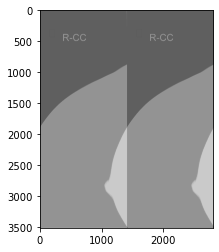

In [19]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) 

In [20]:
ds.PhotometricInterpretation = 'RGB'
ds.SamplesPerPixel = 3
ds.BitsAllocated = 8
ds.BitsStored = 8
ds.HighBit = 7
ds.add_new(0x00280006, 'US', 0)

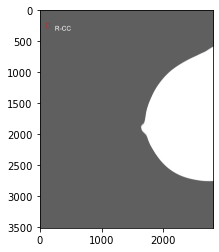

In [21]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) 

In [22]:
ds.file_meta


(0002, 0000) File Meta Information Group Length  UL: 216
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1578.15.4.203177791.8104.1658401325.47
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1578.15.0.2.0.0
(0002, 0013) Implementation Version Name         SH: 'DATAMED_DCM_200'

In [23]:
ds.is_little_endian = True
ds.fix_meta_info()

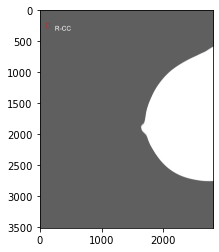

In [24]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) 

In [ ]:
####################guya ki scaling de###########

In [58]:
import math
from collections.abc import Iterable
import pydicom

data min: 0.0, max: 4082.0
window center: 2048, rescale intercept: 0
final intercept: -2048.0
after applying intercept, min: -2048.0, max: 2034.0
after scaling to 0-255, min: 0.0, max: 255.0


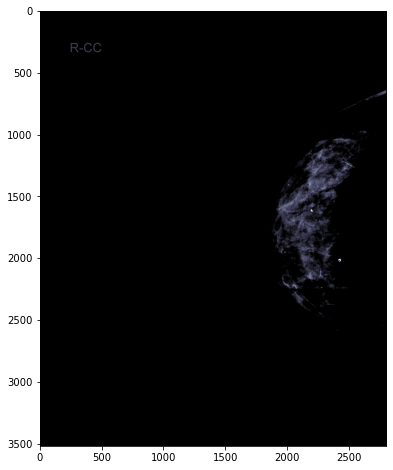

In [62]:
def show_img255(img_path, colormap = None, extra_brightness=0):
    #ds = pydicom.dcmread(img_path)
    shape = ds.pixel_array.shape
    target = 255

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)
    img_data = image_2d
    print(f"data min: {img_data.min()}, max: {img_data.max()}")
    print(f"window center: {ds.WindowCenter}, rescale intercept: {ds.RescaleIntercept}")
    multival = isinstance(ds.WindowCenter, Iterable)
    if multival:
        scale_center = -ds.WindowCenter[0]
    else:
        scale_center = -ds.WindowCenter
        intercept = scale_center+ds.RescaleIntercept+extra_brightness
        print(f"final intercept: {intercept}")
        image_2d += intercept
        print(f"after applying intercept, min: {image_2d.min()}, max: {image_2d.max()}")

        # Rescaling grey scale between 0-255
        image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
        print(f"after scaling to 0-255, min: {image_2d_scaled.min()}, max: {image_2d_scaled.max()}")

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    plt.figure(figsize=(12,8))
    plt.imshow(image_2d_scaled, cmap=colormap)
    plt.show()

#show_img(f'{DATA_DIR}/train/ID00011637202177653955184/1.dcm', colormap=plt.cm.bone) <-image 0 below
show_img255("E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0\CN00020000.dcm", colormap=plt.cm.bone) #image 1
#show_img(files[0], colormap=plt.cm.bone) #image 2

data min: 0.0, max: 4082.0
window center: 2048, rescale intercept: 0
final intercept: -2048.0
after applying intercept, min: -2048.0, max: 2034.0
after scaling to 0-500, min: 0.0, max: 500.0


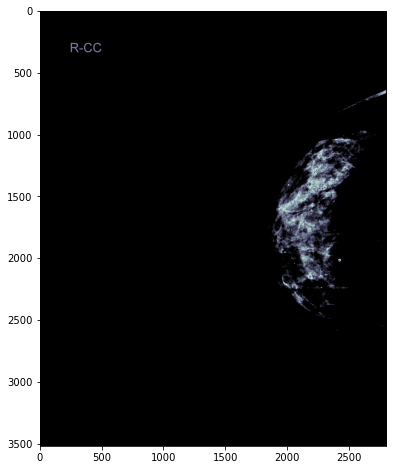

In [66]:
def show_img500(img_path, colormap = None, extra_brightness=0):
    #ds = pydicom.dcmread(img_path)
    shape = ds.pixel_array.shape
    target = 500

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)
    img_data = image_2d
    print(f"data min: {img_data.min()}, max: {img_data.max()}")
    print(f"window center: {ds.WindowCenter}, rescale intercept: {ds.RescaleIntercept}")
    multival = isinstance(ds.WindowCenter, Iterable)
    if multival:
        scale_center = -ds.WindowCenter[0]
    else:
        scale_center = -ds.WindowCenter
        intercept = scale_center+ds.RescaleIntercept+extra_brightness
        print(f"final intercept: {intercept}")
        image_2d += intercept
        print(f"after applying intercept, min: {image_2d.min()}, max: {image_2d.max()}")

        # Rescaling grey scale between 0-500
        image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 500.0
        print(f"after scaling to 0-500, min: {image_2d_scaled.min()}, max: {image_2d_scaled.max()}")

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    plt.figure(figsize=(12,8))
    plt.imshow(image_2d_scaled, cmap=colormap)
    plt.show()

#show_img(f'{DATA_DIR}/train/ID00011637202177653955184/1.dcm', colormap=plt.cm.bone) <-image 0 below
show_img500("E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0\CN00020000.dcm", colormap=plt.cm.bone) #image 1
#show_img(files[0], colormap=plt.cm.bone) #image 2

data min: 0.0, max: 4082.0
window center: 2048, rescale intercept: 0
final intercept: -2048.0
after applying intercept, min: -2048.0, max: 2034.0
after scaling to 0-1000, min: 0.0, max: 1000.0


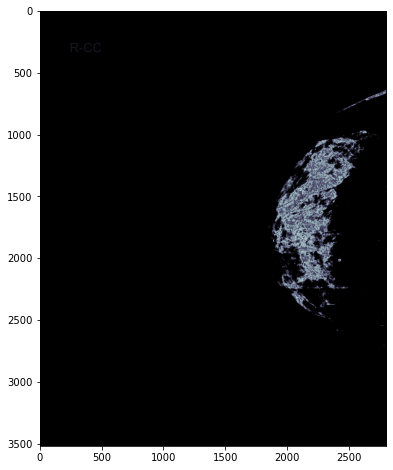

In [67]:
def show_img1000(img_path, colormap = None, extra_brightness=0):
    #ds = pydicom.dcmread(img_path)
    shape = ds.pixel_array.shape
    target = 1000

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)
    img_data = image_2d
    print(f"data min: {img_data.min()}, max: {img_data.max()}")
    print(f"window center: {ds.WindowCenter}, rescale intercept: {ds.RescaleIntercept}")
    multival = isinstance(ds.WindowCenter, Iterable)
    if multival:
        scale_center = -ds.WindowCenter[0]
    else:
        scale_center = -ds.WindowCenter
        intercept = scale_center+ds.RescaleIntercept+extra_brightness
        print(f"final intercept: {intercept}")
        image_2d += intercept
        print(f"after applying intercept, min: {image_2d.min()}, max: {image_2d.max()}")

        # Rescaling grey scale between 0-1000
        image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 1000.0
        print(f"after scaling to 0-1000, min: {image_2d_scaled.min()}, max: {image_2d_scaled.max()}")

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    plt.figure(figsize=(12,8))
    plt.imshow(image_2d_scaled, cmap=colormap)
    plt.show()

#show_img(f'{DATA_DIR}/train/ID00011637202177653955184/1.dcm', colormap=plt.cm.bone) <-image 0 below
show_img1000("E:\OneDrive - ADA University\Homework\Fall2022\SDP\Mammograms\Anonomis\s0\CN00020000.dcm", colormap=plt.cm.bone) #image 1
#show_img(files[0], colormap=plt.cm.bone) #image 2